## Mixed data
Eg. Cabin no. (D41) can be split into D(category) and 41(number)

## Loading data

In [19]:
import numpy as np
import pandas as pd
df = pd.read_csv('titanic.csv')
df.head(5)

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


### Number col has one category has A

In [20]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

<Axes: xlabel='count', ylabel='number'>

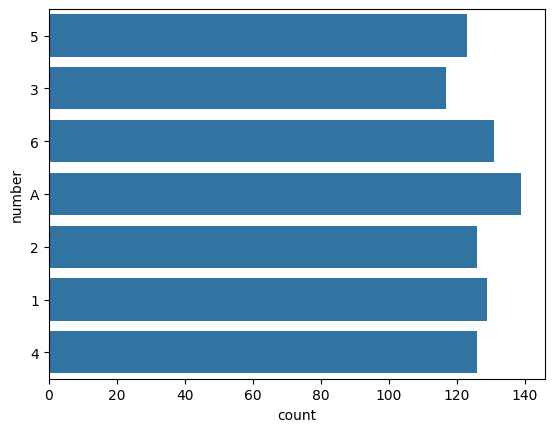

In [21]:
import seaborn as sns
sns.countplot(df['number'])

In [22]:
# Extract numerical part
df['number_numerical'] = pd.to_numeric(df["number"], errors="coerce", downcast="integer")

# Extract categorical part
# np.where(condition, value_if_true, value_if_false)
df['number_categorical'] = np.where(df['number_numerical'].isnull(), df['number'], np.nan)

df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [30]:
df['number_numerical'].unique()

array([ 5.,  3.,  6., nan,  2.,  1.,  4.])

In [31]:
df['number_categorical'].unique()

array([nan, 'A'], dtype=object)

### Handling Cabin column

In [23]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [24]:
# Capture first letter
df['cabin_cat'] = df['Cabin'].str[0]

# Capture numerical part
# (\d+) means:
# \d → digit (0–9)
# + → one or more digits
# ( ... ) → capture group (return whatever matches inside).
df['cabin_num'] = df['Cabin'].str.extract('(\d+)')

df.head()

<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2489886360.py:9: SyntaxWarning: invalid escape sequence '\d'
  df['cabin_num'] = df['Cabin'].str.extract('(\d+)')


,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_cat,cabin_num
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,C,85
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,C,123
4,NaN,373450,A,0,NaN,A,NaN,NaN


In [25]:
df['cabin_cat'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [26]:
df['cabin_num'].unique()

array([nan, '85', '123', '46', '6', '103', '56', '23', '78', '33', '30',
       '52', '28', '83', '73', '31', '5', '10', '26', '110', '58', '101',
       '69', '47', '86', '2', '19', '7', '49', '4', '32', '80', '36',
       '15', '93', '35', '87', '77', '67', '94', '125', '99', '118', '22',
       '106', '65', '54', '57', '34', '18', '124', '91', '40', '128',
       '37', '50', '82', '96', '44', '104', '111', '92', '38', '21', '12',
       '63', '14', '20', '79', '25', '95', '39', '70', '16', '68', '41',
       '9', '48', '126', '71', '51', '62', '24', '90', '45', '8', '121',
       '11', '3', '17', '102', '42', '148'], dtype=object)

### Handling ticket column

In [27]:
# Extract first part of ticket as category
df['ticket_cat'] = df['Ticket'].apply(lambda x:x.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(), np.nan, df['ticket_cat'])

# Extract last part of ticket as number
df['ticket_num'] = df['Ticket'].apply(lambda x:x.split()[-1])
df['ticket_num'] = pd.to_numeric(df['ticket_num'], errors='coerce')

df.head(20)

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_cat,cabin_num,ticket_cat,ticket_num
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,A/5,21171.0
1,C85,PC 17599,3,1,3.0,NaN,C,85,PC,17599.0
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,STON/O2.,3101282.0
3,C123,113803,3,1,3.0,NaN,C,123,NaN,113803.0
4,NaN,373450,A,0,NaN,A,NaN,NaN,NaN,373450.0
5,NaN,330877,2,0,2.0,NaN,NaN,NaN,NaN,330877.0
6,E46,17463,2,0,2.0,NaN,E,46,NaN,17463.0
7,NaN,349909,5,0,5.0,NaN,NaN,NaN,NaN,349909.0
8,NaN,347742,1,1,1.0,NaN,NaN,NaN,NaN,347742.0
9,NaN,237736,A,1,NaN,A,NaN,NaN,NaN,237736.0


In [28]:
df['ticket_cat'].unique()

array(['A/5', 'PC', 'STON/O2.', nan, 'PP', 'A/5.', 'C.A.', 'A./5.',
       'SC/Paris', 'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C',
       'W./C.', 'SOTON/OQ', 'W.E.P.', 'STON/O', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'LINE', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'A/4', 'WE/P',
       'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2', 'S.C./PARIS',
       'C.A./SOTON'], dtype=object)

In [29]:
df['ticket_num'].dtype

dtype('float64')